In [ ]:
import pandas as pd

In [ ]:
path="../input/aptos2019-blindness-detection/"

In [ ]:
df = pd.read_csv(path+'train.csv')

In [ ]:
df.head()

# Histogram şeklinde verilerin grafiği

In [ ]:
df['diagnosis'].hist()

# Elimizdeki verilerin sayısını inceleme

In [ ]:
df['diagnosis'].value_counts()

In [ ]:
örnek = df.sort_values(by=['id_code'])

In [ ]:
örnek.head()

In [ ]:
import os

In [ ]:
files = os.listdir(path+'train_images')

In [ ]:
files[1:5]

In [ ]:
len(files)

In [ ]:
import cv2

In [ ]:
img_list=[]

for i in files[0:20] :
    image = cv2.imread(path+'train_images/'+i)
    image = cv2.resize(image,(400,400))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    img_list.append(image)

In [ ]:
len(img_list)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_list[0])

In [ ]:
plt.imshow(img_list[19])

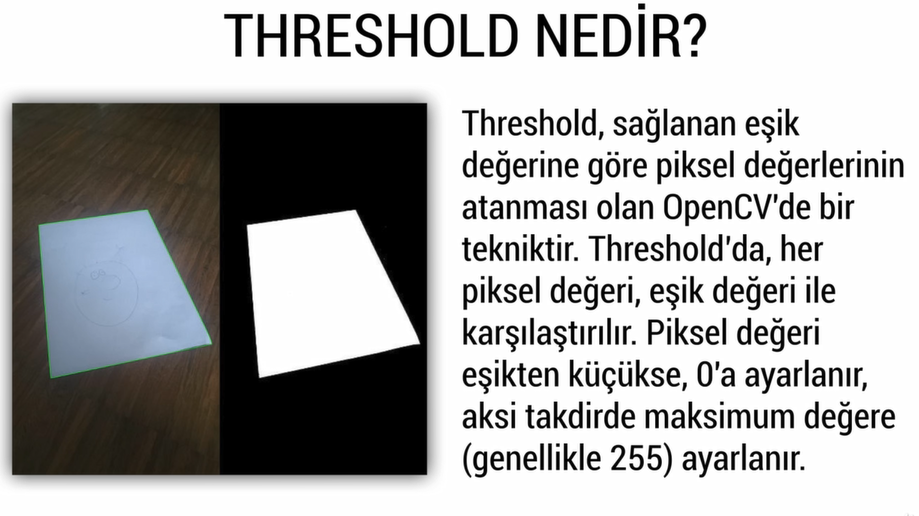

In [ ]:
kopya = img_list[0].copy()

In [ ]:
kopya = cv2.cvtColor(kopya,cv2.COLOR_RGB2GRAY)

In [ ]:
plt.imshow(kopya,cmap='gray')

In [ ]:
kopya.shape

In [ ]:
blur = cv2.cv2.GaussianBlur(kopya,(5,5),0)

In [ ]:
plt.imshow(blur,cmap='gray')

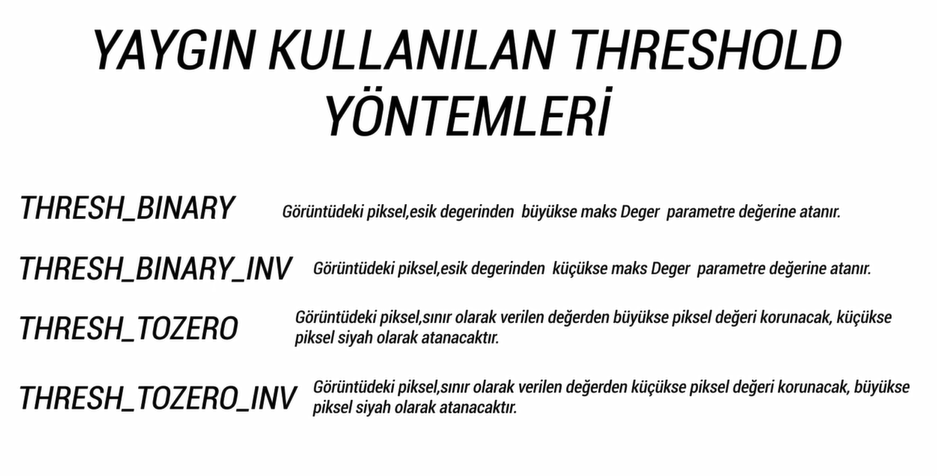

In [ ]:
thresh = cv2.threshold(blur,10,255,cv2.THRESH_BINARY)[1]

In [ ]:
plt.imshow(thresh,cmap='gray')

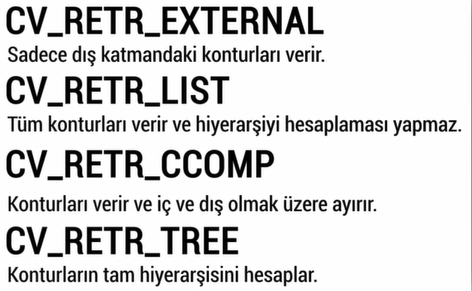

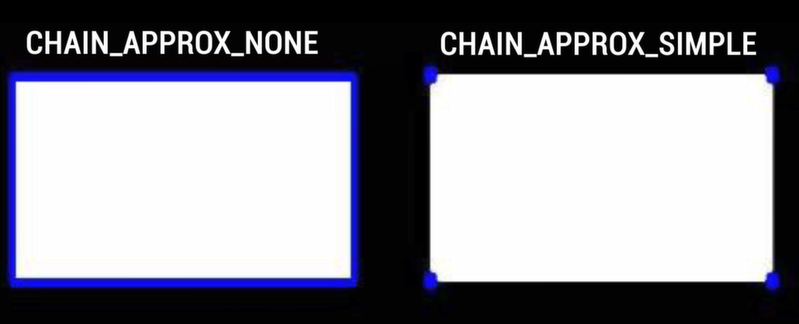

In [ ]:
kontur = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
kontur

In [ ]:
kontur = kontur[0][0]

In [ ]:
kontur.shape

In [ ]:
kontur = kontur[:,0,:]
kontur.shape                

In [ ]:
kontur

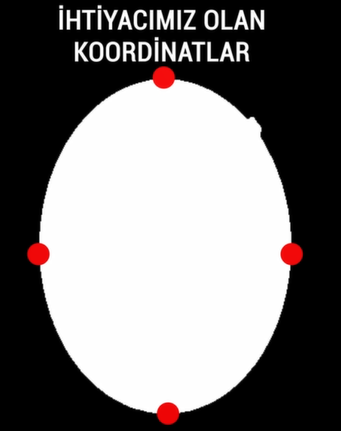

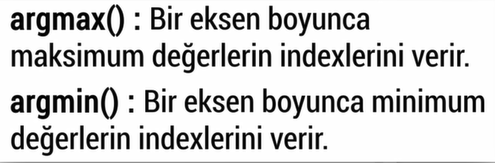

In [ ]:
sol = tuple(kontur[kontur[:,0].argmin()])
sağ = tuple(kontur[kontur[:,0].argmax()])
üst = tuple(kontur[kontur[:,1].argmin()])
alt = tuple(kontur[kontur[:,1].argmax()])

In [ ]:
sol,sağ,üst,alt

In [ ]:
x1 = sol[0]
y1 = üst[1]
x2 = sağ[0]
y2 = alt[1]

In [ ]:
x1,y1,x2,y2

In [ ]:
orjinal = img_list[0].copy()

In [ ]:
plt.imshow(orjinal)

In [ ]:
crop = orjinal[y1:y2 , x1:x2]

In [ ]:
plt.imshow(crop)

In [ ]:
crop.shape

In [ ]:
crop = cv2.resize(crop,(400,400))

In [ ]:
plt.imshow(crop)

# CLAHE -> Kontrast Limitli Adaptif Histogram Eşitleme

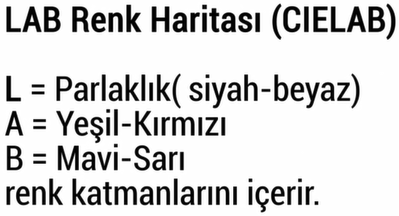

In [ ]:
lab = cv2.cvtColor(crop,cv2.COLOR_RGB2LAB)

In [ ]:
lab.shape

In [ ]:
l,a,b = cv2.split(lab)

In [ ]:
plt.imshow(l,cmap='gray')

In [ ]:
l.shape

In [ ]:
düz = l.flatten()

In [ ]:
düz.shape

In [ ]:
plt.hist(düz,25,[0,255],color='r')
plt.show()

In [ ]:
clahe = cv2.createCLAHE(clipLimit=7.0,tileGridSize=((8,8)))
cl = clahe.apply(l)

In [ ]:
plt.hist(cl.flatten(),25,[0,255],color='r')
plt.show()

In [ ]:
plt.subplot(1,2,1)
plt.imshow(cl,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(l,cmap='gray')

In [ ]:
limg = cv2.merge((cl,a,b))

In [ ]:
son = cv2.cvtColor(limg,cv2.COLOR_LAB2RGB)

In [ ]:
plt.subplot(1,2,1)
plt.imshow(son)

plt.subplot(1,2,2)
plt.imshow(crop)

# Median Blur

In [ ]:
med_son = cv2.medianBlur(son,3)

In [ ]:
plt.subplot(1,2,1)
plt.imshow(med_son)

plt.subplot(1,2,2)
plt.imshow(crop)

# Maske

In [ ]:
arka_plan = cv2.medianBlur(son,37)

In [ ]:
maske = cv2.addWeighted(med_son,1,arka_plan,-1,255)
plt.imshow(maske)

In [ ]:
son_img = cv2.bitwise_and(maske,med_son)

oluşturduğumuz maskeyi orjinal görüntü ile birleştirerek kan damarlarının daha belirgin hale gelmesini sağladık

In [ ]:
plt.subplot(1,2,1)
plt.imshow(med_son)

plt.subplot(1,2,2)
plt.imshow(son_img)

In [ ]:
i =files[7]
image = cv2.imread(path+'train_images/'+i)
image = cv2.resize(image,(400,400))
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
img_list=[]

from tqdm.notebook import tqdm # yaptığımız işlemlerdeki ilerlemeyi göselleştirmeye yarayan bir kütüphane

for i in tqdm(files[0:1000]) :
    image = cv2.imread(path+'train_images/'+i)
    image = cv2.resize(image,(400,400))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    kopya = image.copy()
    kopya = cv2.cvtColor(kopya,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(kopya,(5,5),0)
    thresh = cv2.threshold(blur,10,255,cv2.THRESH_BINARY)[1]
    kontur = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    kontur = kontur[0][0]
    kontur = kontur[:,0,:]
    x1 = tuple(kontur[kontur[:,0].argmin()])[0]
    x2 = tuple(kontur[kontur[:,0].argmax()])[0]
    y1 = tuple(kontur[kontur[:,1].argmin()])[1]
    y2 = tuple(kontur[kontur[:,1].argmax()])[1]
    x = int(x2-x1)*4//50
    y = int(y2-y1)*5//50
    kopya2 = image.copy()
    if x2-x1>100 and y2-y1>100 :
        kopya2 = kopya2[y1+y:y2-y , x1+x:x2-x]
        kopya2 = cv2.resize(kopya2,(400,400))
    lab = cv2.cvtColor(kopya2,cv2.COLOR_RGB2LAB)
    l,a,b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=5.0,tileGridSize=((8,8)))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    son = cv2.cvtColor(limg,cv2.COLOR_LAB2RGB)
    med_son = cv2.medianBlur(son,3)
    arka_plan = cv2.medianBlur(son,37)
    maske = cv2.addWeighted(med_son,1,arka_plan,-1,255)
    son_img = cv2.bitwise_and(maske,med_son)
    img_list.append(son_img)

In [ ]:
plt.figure(figsize=(20,12))
for i in range(12) :
    plt.subplot(3,4,i+1)
    plt.imshow(img_list[i])
    
plt.tight_layout()

In [ ]:
df['diagnosis']

`pd.get_dummies` ( sınıflandırma verisi ) Kategorik değişkeni , 0 ve  1'lerden oluşan kukla değişkenlere dönüştürü.( One Hot Encoding )

In [ ]:
y_train = pd.get_dummies(df['diagnosis']).values

In [ ]:
y_train

In [ ]:
df['diagnosis'][0]

In [ ]:
y_train[0]

In [ ]:
import numpy as np
y_train_son = np.ones(y_train.shape,dtype='uint8')

In [ ]:
y_train_son

In [ ]:
y_train_son[:,4]=y_train[:,4]

In [ ]:
y_train_son

In [ ]:
for i in range(3,-1,-1):
    y_train_son[:,i] = np.logical_or(y_train[:,i],y_train_son[:,i+1])

In [ ]:
y_train_son=y_train_son[0:1000]

In [ ]:
y_train

In [ ]:
x_train = np.array(img_list)

In [ ]:
x_train.shape

In [ ]:
y_train_son.shape

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train,
                                              y_train_son,
                                              test_size=0.15,
                                              random_state=42,
                                              shuffle=True)

In [ ]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

`datagen.flow()` Görüntülerin ve sınıflandırma verilerini alır, girilen `batch_size` büyüklüğüne göre, modele eğitime girmeye hazır tensor grupları oluşturur.
Tensor ne kadar büyük olursa , bilgisayar o kadar zorlanır.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
data_generator = datagen.flow(x_train,y_train,batch_size=5,seed=42)

In [ ]:
pip install efficientnet

In [ ]:
from efficientnet.keras import EfficientNetB5

In [ ]:
örnek_model = EfficientNetB5()

In [ ]:
örnek_model.summary()

`include_top=False` son katmandaki fully connected katmanlarını çıkarıyoruz

In [ ]:
örnek_model2 = EfficientNetB5(include_top=False)
örnek_model2.summary()

In [ ]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(EfficientNetB5(weights='imagenet',include_top=False,input_shape=(400,400,3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5,activation='sigmoid'))

In [ ]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0005),metrics=['accuracy'])

`ReduceLROnPlateau()` izlenen monitor değerinin gelişmesi durduğunda öğrenme oranını azaltır.Genelde öğernme durgunlaştığında, öğrenme oranı 2-10 kat azaltığında model başarısı artar. 

In [ ]:
from keras.callbacks import ReduceLROnPlateau

lr = ReduceLROnPlateau(monitor='val_loss',
                       patience= 3,
                       verbose = 1,
                       mode = 'auto',
                       factor = 0.25,
                       min_lr= 0.0001)

In [ ]:
history = model.fit_generator(data_generator,
                             steps_per_epoch=int(len(x_train)/10),
                             epochs=3,
                             validation_data=(x_val,y_val),
                             callbacks=[lr])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('Doğruluk(Accuracy)%')
plt.xlabel('Epoch Sayısı')
plt.ylabel('Yüzde(%)')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('Kayıp Skoru(Loss)%')
plt.xlabel('Epoch Sayısı')
plt.ylabel('Yüzde(%)')

In [ ]:
x_test = np.asarray(x_val)
x_test.shape

In [ ]:
y_test = np.asarray(y_val)
y_test.shape

# Hata Matrisi

In [ ]:
y_test

In [ ]:
y_true = y_test
y_pred = model.predict_classes(x_test)
y_probas = model.predict(x_test)

In [ ]:
y_true[0],y_pred[0],y_probas[0]

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
pred_Y = model.predict(x_test, batch_size = 32, verbose = True)
pred_Y_cat = np.argmax(pred_Y, -1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm=(confusion_matrix(np.argmax(y_true,-1), pred_Y_cat))

In [ ]:
cm2 = pd.DataFrame(cm,columns=['kolon isimleri'],index=['sütun isimleri'])
plt.figure(figsize=(6,5))
hm = sns.heatmap(cm2,annot=True,fmt ='n')
hm.tick_params(labeltop=True,labelbottom=False,top=True,bottom=False)
hm.set_xlabel('Model tahmini')
hm.xaxis.set_label_position('top')
hm.set_ylabel('Doktor teşhisi')